## Data Preprocessing

See commentaries at the end. The dataset was downloaded from [1].

[1] Store Sales -- Time Series Forecasting, an ongoing Kaggle competition.
Data set available on-line and retrieved on 2022-11-01 at
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data.

In [1]:
import pandas as pd

In [2]:
stores = pd.read_csv("data/stores.csv.gz")
stores.info()
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [3]:
stores['city'].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [4]:
stores['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [5]:
stores['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [6]:
stores['cluster'].value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

In [7]:
oil = pd.read_csv("data/oil.csv.gz")
oil.info()
oil.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
oil = oil.dropna()  # certain dates have NaN dcoilwtico

In [9]:
holidays = pd.read_csv("data/holidays_events.csv.gz")
holidays.info()
holidays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
transactions = pd.read_csv("data/transactions.csv.gz")
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
sample_submission = pd.read_csv("data/sample_submission.csv.gz")
sample_submission.info()
sample_submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [12]:
train = pd.read_csv("data/train.csv.gz")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [13]:
train['family'].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [14]:
train['sales'].value_counts()

0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: sales, Length: 379610, dtype: int64

In [15]:
train['onpromotion'].value_counts()

0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: onpromotion, Length: 362, dtype: int64

In [16]:
test = pd.read_csv("data/test.csv.gz")
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [20]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


## Dataset Descriptions

There are 7 csv files in the dataset:

+ store.csv -- store information (store_nbr --> city, state, type, clusterID)
+ oil.csv -- oil price (date --> price); there are some dates with NaN which are removed
+ holidays_events.csv -- date --> locale, and description of the holiday
+ transaction.csv -- date --> store_nbr, #transactions
+ sample_submission.csv -- described the submission format
+ train.csv (training set) -- id --> date, store_nbr, family, onpromotion
+ test.csv (test set) -- id --> date, store_nbr, family, onpromotion

| File       | #rows     | #rows (cleaned) |
| ---------- | --------- | ---- |
| store.csv  | 54        |
| oil.csv    | 1218 | 1175 |
| holidays_events.csv  | 350        |
| transactions.csv  | 83488        |
| sample_submission.csv  | 28512        |
| train.csv  | 3000888        |
| test.csv  | 28512        |

There are 30000888 rows in the training set, and there are 33 unique "family" values, each appear exactly 90936 times. Note that 90936 times 33 equals 3000888 exactly. Moreover, 90936 equals 54 times 1684, and there are exactly 1684
unique dates in the training set.

Overall, we have a complete full matrix made of 54 (stores) x 1684 (dates) x 33 (project family) = 3000888 data points.

The dates on the training data range from 2013-01-01 to 2017-08-15 inclusive. There are a total of 1688 days. Note the discrepancy between 1688 and 1684.

For the test data, there are 28512 entries, where 28512 = 54 * 33 * 16. In other words, we are to predict the store sale for the next 16 days, from 2017-08-16 to 2017-03-31 inclusive. Note that this is exactly the dates after the training data.

transaction.csv provides the number of transaction on a per-store, per-day basis. Note that 83488 / 54 = 1546.07. Theoretically it should be 54 * 1684 = 90936 entries, but we only have 83488 entries. The reason is that not all stores have transaction every day. For example, on 2013-01-01, store 25 has 770 transactions and all other stores have zero transactions. The zero transactions are not recorded in transaction.csv

Note that transaction is different from sales. Transaction is not explained. Maybe just the number of transactions, vs sales is a dollar amount.

Also note the commentaries about national holidays, earthquake, etc.

Okay, earlier I misunderstood the meaning of test.csv. We can actually read it. It contains information
about promotion, etc, but without the sales. We are to predict the sales.

In [27]:
(pd.to_datetime('2017-08-16') - pd.to_datetime('2013-01-01'))

Timedelta('1688 days 00:00:00')

In [36]:
train[(train['store_nbr'] == 25) & (train['date'] == '2013-01-01') & (train['sales'] > 0)]

,id,date,store_nbr,family,sales,onpromotion
563,563,2013-01-01,25,BEAUTY,2.000000,0
564,564,2013-01-01,25,BEVERAGES,810.000000,0
566,566,2013-01-01,25,BREAD/BAKERY,180.589000,0
568,568,2013-01-01,25,CLEANING,186.000000,0
569,569,2013-01-01,25,DAIRY,143.000000,0
570,570,2013-01-01,25,DELI,71.090000,0
571,571,2013-01-01,25,EGGS,46.000000,0
572,572,2013-01-01,25,FROZEN FOODS,29.654999,0
573,573,2013-01-01,25,GROCERY I,700.000000,0
574,574,2013-01-01,25,GROCERY II,15.000000,0


In [37]:
train[(train['store_nbr'] == 25) & (train['date'] == '2013-01-01') & (train['sales'] > 0)]['sales'].sum()

2511.6189990000003

## Exploratory Data Analysis -- Oil Prices

We first look at the oil prices:

In [17]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:>

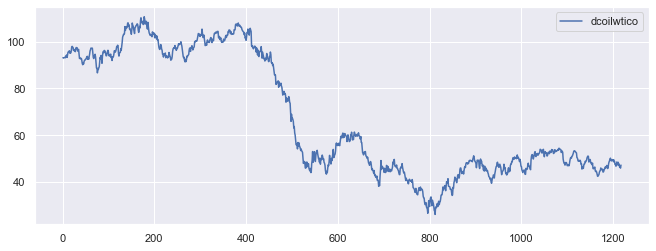

In [18]:
oil.plot()

## Exploratory Data Analysis -- Aggregate Sales

Here's what the aggregate sales over time look like.

<AxesSubplot:xlabel='date'>

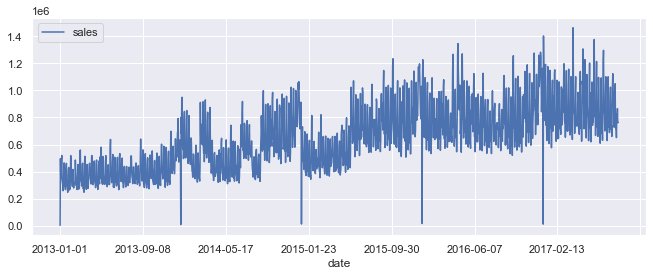

In [19]:
agg = train.groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

We'll also look at a few product categories. The patterns are quite interesting. 's what beverages look like:

<AxesSubplot:xlabel='date'>

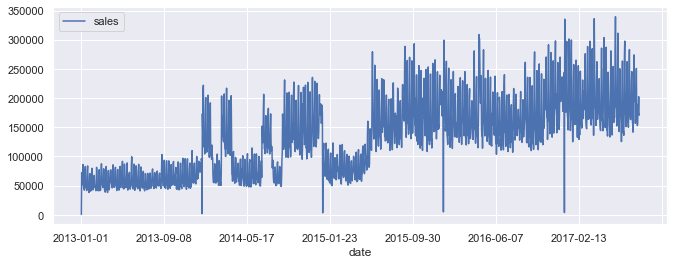

In [20]:
agg = train[train['family'] == 'BEVERAGES'].groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

<AxesSubplot:xlabel='date'>

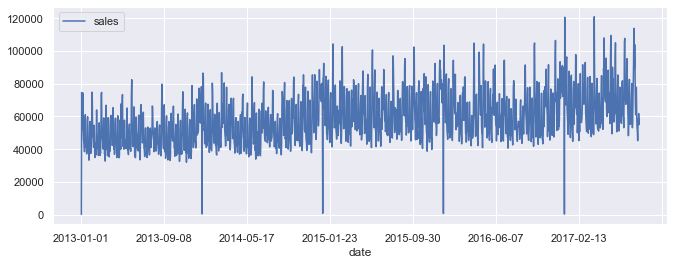

In [21]:
agg = train[train['family'] == 'CLEANING'].groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

<AxesSubplot:xlabel='date'>

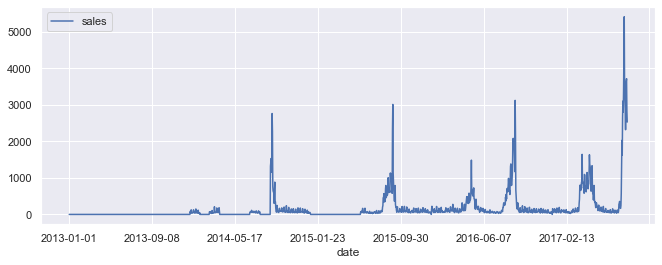

In [22]:
agg = train[train['family'] == 'SCHOOL AND OFFICE SUPPLIES'].groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

<AxesSubplot:xlabel='date'>

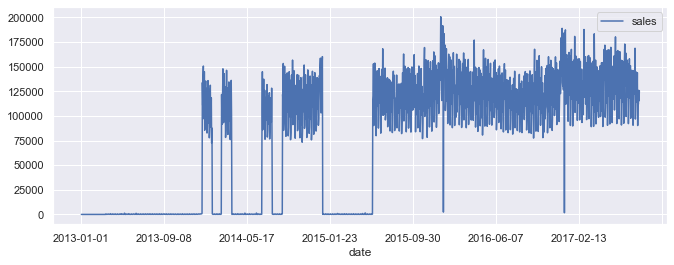

In [23]:
agg = train[train['family'] == 'PRODUCE'].groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

<AxesSubplot:xlabel='date'>

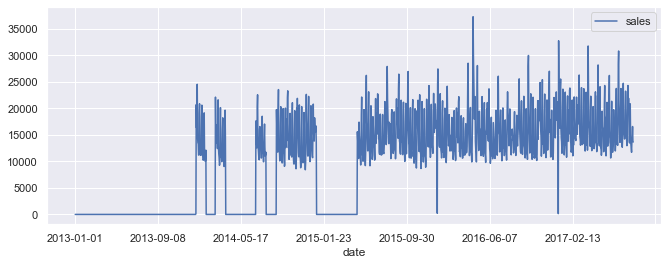

In [24]:
agg = train[train['family'] == 'HOME CARE'].groupby(['date']).sum()
agg = agg.drop(columns=['id', 'store_nbr', 'onpromotion'])
agg.plot()

Just from these data we detected interesting or problematic patterns by product family. Note also the anomaly that seemingly happens at a regular interval. It turns out there is no data on the first day of each year.

## Exploratory Data Analysis -- Correlations

In the following we look at the correlations between different product families.

In [25]:
homecare = train[train['family'] == 'HOME CARE'].groupby(['date']).sum()
homecare = homecare.drop(columns=['id', 'store_nbr', 'onpromotion'])
cleaning = train[train['family'] == 'CLEANING'].groupby(['date']).sum()
cleaning = cleaning.drop(columns=['id', 'store_nbr', 'onpromotion'])
produce = train[train['family'] == 'PRODUCE'].groupby(['date']).sum()
produce = produce.drop(columns=['id', 'store_nbr', 'onpromotion'])
school = train[train['family'] == 'SCHOOL AND OFFICE SUPPLIES'].groupby(['date']).sum()
school = school.drop(columns=['id', 'store_nbr', 'onpromotion'])

<AxesSubplot:xlabel='date'>

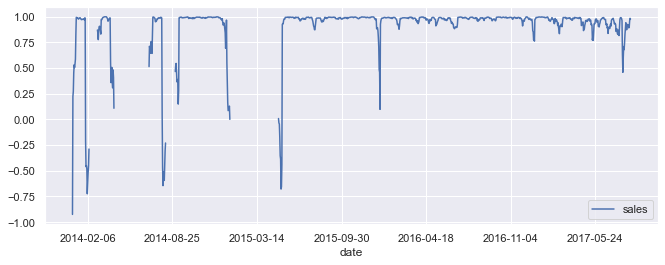

In [26]:
homecare.rolling(10).corr(cleaning).plot()

<AxesSubplot:xlabel='date'>

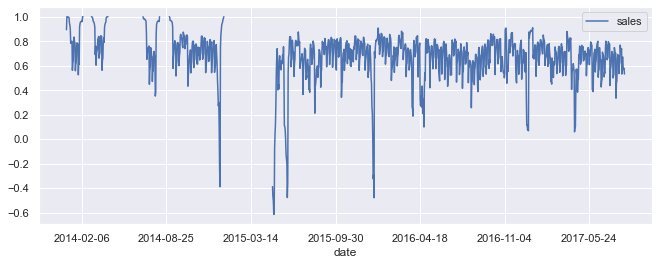

In [27]:
homecare.rolling(10).corr(produce).plot()

<AxesSubplot:xlabel='date'>

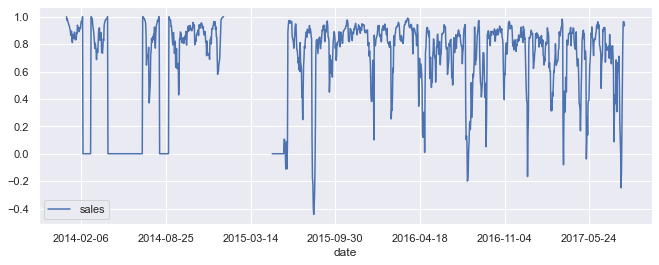

In [28]:
homecare.rolling(10).corr(school).plot()

## Exploratory Data Analysis -- Food for Thought

+ While generally the product families are correlated with each other, there is significant difference in their
characteristics.
+ Time will be a significant factor in our analysis -- there is an upward trend of overall sales.
+ There are anomalies that require further understanding of the dataset.
+ Some products have gross amount of missing data. We need to find an explanation for this or else a significant
portion of the past data is not reliable. We may be forced to use only the most recent half of the dataset for
full analysis.
+ How do we take advantage of, or deal with, the various kinds of correlation between different product families?
Obviously they are related but they don't move in lock steps.